In [107]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [305]:
pha_df=pd.read_csv("NEO_Asteroids_with_defined_H_and_MOID.csv")
pha_df.head()

,id,H,epoch_mjd,n,moid,sigma_n,rms,pha
0,a0000433,10.4,59000,0.559819,0.148623,5.560000e-11,0.27423,0
1,a0000719,15.4,59000,0.229955,0.203482,3.310000e-10,0.39148,0
2,a0000887,13.8,59000,0.253323,0.082217,1.050000e-09,0.49954,0
3,a0001036,9.4,59000,0.226582,0.344956,3.080000e-10,0.38187,0
4,a0001221,17.7,59000,0.370615,0.107451,2.960000e-10,0.45943,0


In [109]:
pha_df.shape

(23054, 8)

In [110]:
pha_df = pha_df[['H', 'epoch_mjd', 'n', 'moid', 'sigma_n', 'rms', 'pha']]
pha_df['pha'] = pha_df['pha'].astype('int')
pha_df.head()

,H,epoch_mjd,n,moid,sigma_n,rms,pha
0,10.4,59000,0.559819,0.148623,5.560000e-11,0.27423,0
1,15.4,59000,0.229955,0.203482,3.310000e-10,0.39148,0
2,13.8,59000,0.253323,0.082217,1.050000e-09,0.49954,0
3,9.4,59000,0.226582,0.344956,3.080000e-10,0.38187,0
4,17.7,59000,0.370615,0.107451,2.960000e-10,0.45943,0


In [293]:
LR.coef_

array([[-4.15,  0.11,  0.04, -9.8 ,  0.1 ,  0.01]])

In [297]:
SGDC.coef_

array([[-4.19,  0.14, -0.02, -9.23, -1.31, -4.23]])

In [306]:
X = np.asarray(pha_df[['H', 'epoch_mjd', 'n', 'moid', 'sigma_n', 'rms']])
X[0:5]

array([[1.04e+01, 5.90e+04, 5.60e-01, 1.49e-01, 5.56e-11, 2.74e-01],
       [1.54e+01, 5.90e+04, 2.30e-01, 2.03e-01, 3.31e-10, 3.91e-01],
       [1.38e+01, 5.90e+04, 2.53e-01, 8.22e-02, 1.05e-09, 5.00e-01],
       [9.40e+00, 5.90e+04, 2.27e-01, 3.45e-01, 3.08e-10, 3.82e-01],
       [1.77e+01, 5.90e+04, 3.71e-01, 1.07e-01, 2.96e-10, 4.59e-01]])

In [163]:
y = np.asarray(pha_df['pha'])
y [0:5]

array([0, 0, 0, 0, 0])

In [304]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-4.19,  0.44,  0.15,  0.54, -0.04, -0.02],
       [-2.51,  0.44, -1.03,  1.08, -0.04, -0.01],
       [-3.05,  0.44, -0.95, -0.11, -0.04, -0.01],
       [-4.52,  0.44, -1.04,  2.47, -0.04, -0.01],
       [-1.74,  0.44, -0.53,  0.14, -0.04, -0.01]])

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.1,random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20748, 6) (20748,)
Test set: (2306, 6) (2306,)


In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [287]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.96e-01, 4.38e-03],
       [1.00e+00, 4.53e-05],
       [1.00e+00, 1.73e-05],
       ...,
       [9.84e-01, 1.59e-02],
       [9.88e-01, 1.16e-02],
       [1.00e+00, 1.22e-06]])

In [288]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7184873949579832

In [289]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 171   43]
 [  24 2068]]


Confusion matrix, without normalization
[[ 171   43]
 [  24 2068]]


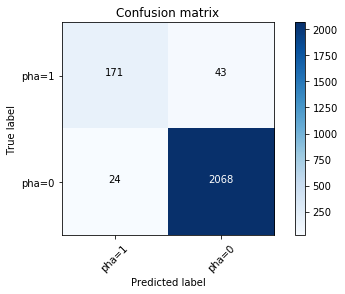

In [290]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['pha=1','pha=0'],normalize= False,  title='Confusion matrix')

In [291]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2092
           1       0.88      0.80      0.84       214

    accuracy                           0.97      2306
   macro avg       0.93      0.89      0.91      2306
weighted avg       0.97      0.97      0.97      2306



In [294]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.08242011812815465

In [295]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss='log').fit(X_train,y_train)
SGDC

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [298]:
yhat_2 = SGDC.predict(X_test)
yhat_2

array([0, 0, 0, ..., 0, 0, 0])

In [299]:
yhat_2_prob=SGDC.predict_proba(X_test)
yhat_2_prob

array([[9.96e-01, 3.96e-03],
       [1.00e+00, 5.70e-05],
       [1.00e+00, 5.49e-05],
       ...,
       [9.85e-01, 1.48e-02],
       [9.91e-01, 8.77e-03],
       [1.00e+00, 2.20e-06]])

In [300]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_2, labels=[1,0]))

[[ 172   42]
 [  29 2063]]


Confusion matrix, without normalization
[[ 172   42]
 [  29 2063]]


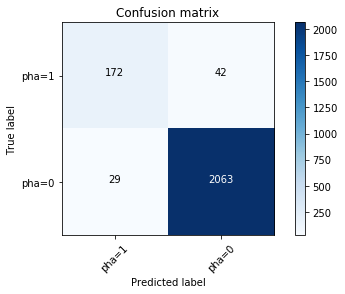

In [301]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['pha=1','pha=0'],normalize= False,  title='Confusion matrix')

In [302]:
print (classification_report(y_test, yhat_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2092
           1       0.86      0.80      0.83       214

    accuracy                           0.97      2306
   macro avg       0.92      0.89      0.91      2306
weighted avg       0.97      0.97      0.97      2306



In [303]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_2_prob)

0.08377696153326236